<a href="https://colab.research.google.com/github/AarifSheikh-78603/YBI-Foundation/blob/main/Bank%20Customer%20Churn%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction Model

## Objective

The objective of this project is to develop a predictive model to identify bank customers who are likely to churn (i.e., leave the bank).

This analysis will involve exploring the dataset, preprocessing the data, building and evaluating a machine learning model, and making predictions on customer churn.

This project is part of my internship training, where I apply the skills learned in Python, data analysis, and machine learning to solve real-world business problems.

The results from this project can help the bank implement targeted retention strategies, reducing customer attrition and improving overall customer satisfaction.

## Data Source

The dataset is provided as a CSV file containing customer information and attributes relevant to predicting churn.

The dataset for this project is sourced from Kaggle, a popular platform for data science competitions and datasets.

The dataset contains detailed information on bank customers, including their demographics, account balance, and transaction history.

 It is widely used for developing churn prediction models, making it an ideal choice for this internship project to apply machine learning techniques in a real-world scenario.

## Import Libraries

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Reading CSV Data File

In [261]:
df = pd.read_csv('churn.csv')

## Data Inspection

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [263]:
df.shape

(10000, 14)

In [264]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [265]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [266]:
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


## Visualization

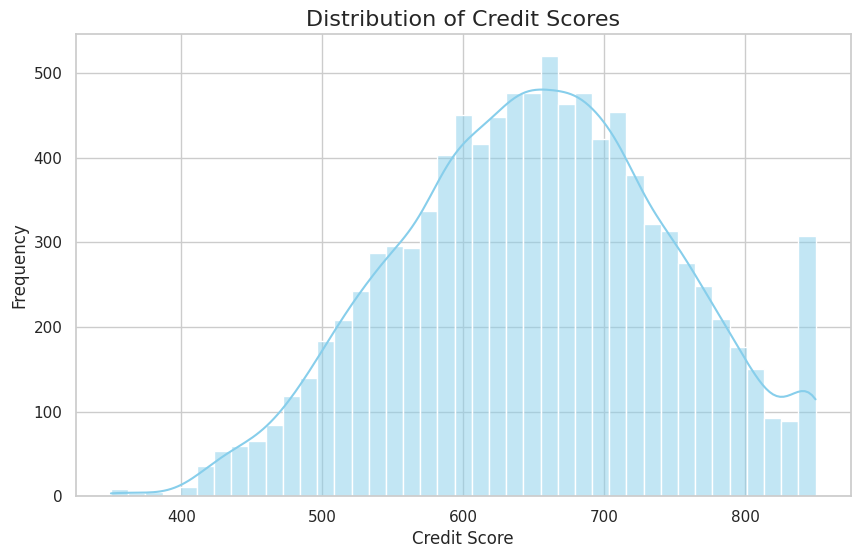

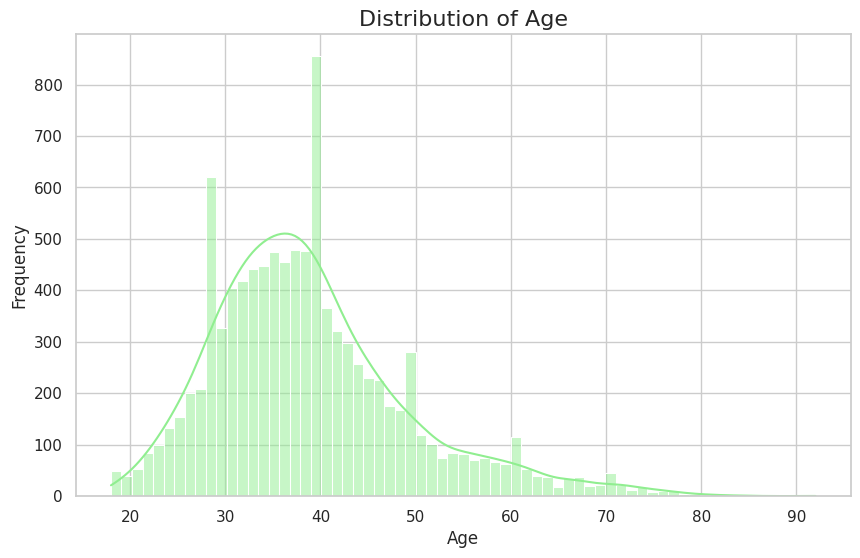

<ipython-input-267-dfcdab0c8a59>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Geography'], palette='Set2')


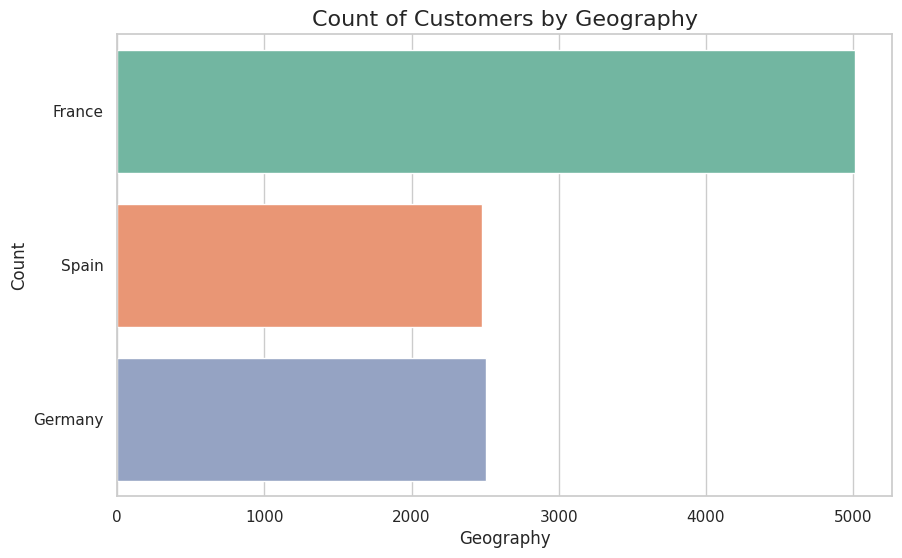

<ipython-input-267-dfcdab0c8a59>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df, palette='Set3')


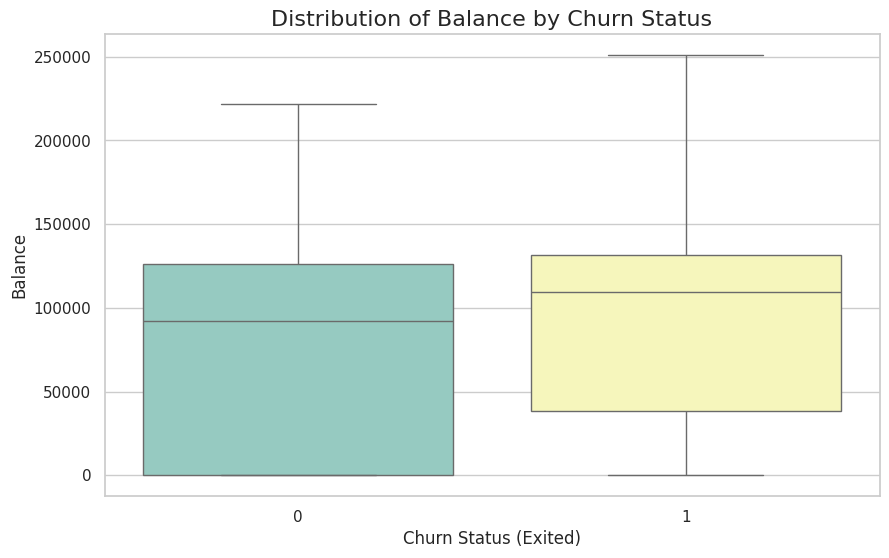

In [267]:
# Set the style for the plots
sns.set(style="whitegrid")

# Visualizing the distribution of Credit Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], kde=True, color='skyblue')
plt.title('Distribution of Credit Scores', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualizing the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='lightgreen')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualizing the count of customers by Geography
plt.figure(figsize=(10, 6))
sns.countplot(df['Geography'], palette='Set2')
plt.title('Count of Customers by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Visualizing the distribution of Balance by Exited (Churn)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df, palette='Set3')
plt.title('Distribution of Balance by Churn Status', fontsize=16)
plt.xlabel('Churn Status (Exited)', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.show()

## Display top entries

In [268]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [269]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Display last entries

In [270]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [271]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Handling Missing Values

In [272]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


## Data Cleaning

In [273]:
df.drop_duplicates(inplace=True)  # Remove duplicate rows

In [274]:
df.duplicated('CustomerId').sum()  # Check for duplicate 'CustomerId' values

0

## Encoding

In [275]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [276]:
df.replace({'Geography':{'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

In [277]:
df['Geography'].value_counts()

,count
Geography,
2,5014
1,2509
0,2477


In [278]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [279]:
df.replace({'Gender':{'Male': 0, 'Female': 1}}, inplace=True)

In [280]:
df['Gender'].value_counts()

,count
Gender,
0,5457
1,4543


In [281]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [282]:
df.replace({'NumOfProducts':{1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [283]:
df['NumOfProducts'].value_counts()

,count
NumOfProducts,
0,5084
1,4916


In [284]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [285]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [286]:
df.loc[(df['Balance']==0), 'Exited'].value_counts()

,count
Exited,
0,3117
1,500


In [287]:
df['Zero Balance'] = np.where(df['Balance'] > 0, 1, 0)

<Axes: >

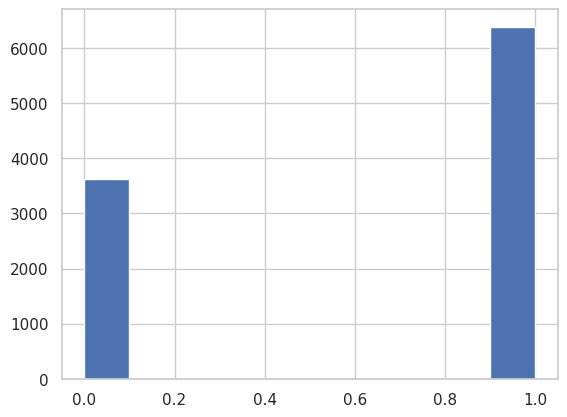

In [288]:
df['Zero Balance'].hist()

In [289]:
df.groupby(['Exited', 'Geography']).count()

RowNumber  CustomerId  Surname  CreditScore  Gender   Age  \
Exited Geography                                                              
0      0               2064        2064     2064         2064    2064  2064   
       1               1695        1695     1695         1695    1695  1695   
       2               4204        4204     4204         4204    4204  4204   
1      0                413         413      413          413     413   413   
       1                814         814      814          814     814   814   
       2                810         810      810          810     810   810   

                  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited Geography                                                              
0      0            2064     2064           2064       2064            2064   
       1            1695     1695           1695       1695            1695   
       2            4204     4204           4204       4204            4204   
1      0             413      413            413        413             413   
       1             814      814            814        814             814   
       2             810      810            810        810             810   

                  EstimatedSalary  Zero Balance  
Exited Geography                                 
0      0                     2064          2064  
       1                     1695          1695  
       2                     4204          4204  
1      0                      413           413  
       1                      814           814  
       2                      810           810

## Define Label & Features

In [290]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [291]:
A = df.drop(['Surname', 'Exited'], axis=1)
B = df['Exited']

In [292]:
A.shape, B.shape

((10000, 13), (10000,))

In [293]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

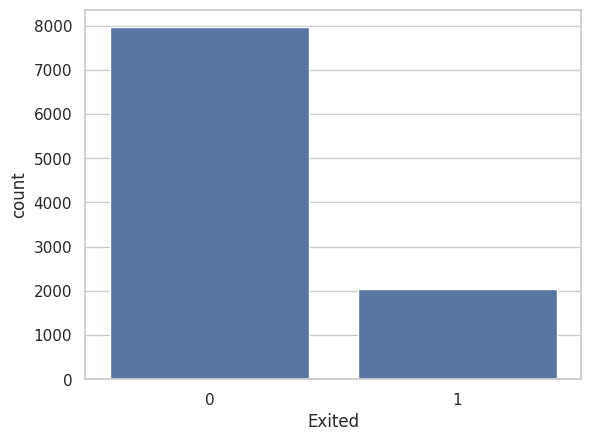

In [294]:
sns.countplot(x='Exited', data =df)

In [295]:
A.shape, B.shape

((10000, 13), (10000,))

## Random Under Sampling

In [296]:
from imblearn.under_sampling import RandomUnderSampler

In [297]:
RUS = RandomUnderSampler(random_state=2529)

In [298]:
A_RUS, B_RUS = RUS.fit_resample(A, B)

In [299]:
A_RUS.shape, B_RUS.shape, A.shape, B.shape

((4074, 13), (4074,), (10000, 13), (10000,))

In [300]:
B.value_counts()

,count
Exited,
0,7963
1,2037


In [301]:
B_RUS.value_counts()

,count
Exited,
0,2037
1,2037


<Axes: ylabel='Frequency'>

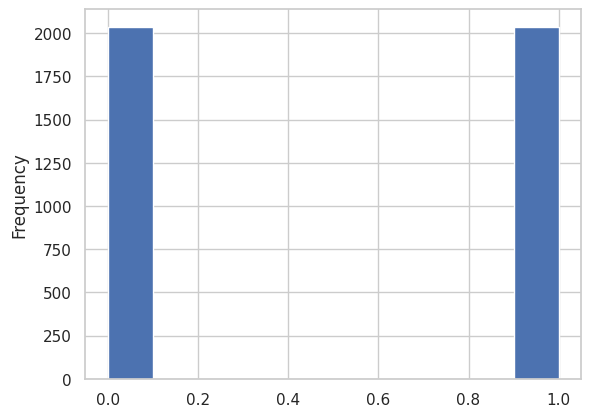

In [302]:
B_RUS.plot(kind='hist')

## Random Over Sampling

In [303]:
from imblearn.over_sampling import RandomOverSampler

In [304]:
ROS = RandomUnderSampler(random_state=2529)

In [305]:
A_ROS, B_ROS = ROS.fit_resample(A, B)

In [306]:
A_ROS.shape, B_ROS.shape, A.shape, B.shape

((4074, 13), (4074,), (10000, 13), (10000,))

In [307]:
B.value_counts()

,count
Exited,
0,7963
1,2037


In [308]:
B_ROS.value_counts()

,count
Exited,
0,2037
1,2037


<Axes: ylabel='Frequency'>

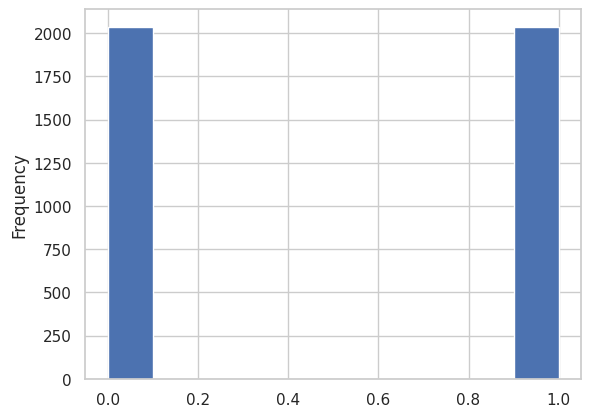

In [309]:
B_ROS.plot(kind='hist')

## Train Test Split

In [310]:
from sklearn.model_selection import train_test_split

## Split Original Data

In [311]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.3, random_state=2529)

## Split Random Under Sample Data

In [312]:
A_train_RUS, A_test_RUS, B_train_RUS, B_test_RUS = train_test_split(A_RUS, B_RUS, test_size=0.3, random_state=2529)

## Split Random Over Sample Data

In [313]:
A_train_ROS, A_test_ROS, B_train_ROS, B_test_ROS = train_test_split(A_ROS, B_ROS, test_size=0.3, random_state=2529)

## Standardize Features

In [314]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## Standardize Original Data

In [315]:
A_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = sc.fit_transform(A_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [316]:
A_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = sc.fit_transform(A_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

## Standardize Random Under Sample Data

In [317]:
A_train_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = sc.fit_transform(A_train_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [318]:
A_test_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = sc.fit_transform(A_test_RUS[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

## Support Vector Machine Classifier (SVMC)

In [319]:
from sklearn.svm import SVC
SVC = SVC()

In [320]:
SVC.fit(A_train, B_train)

SVC()

In [321]:
B_pred = SVC.predict(A_test)

## Model Accuracy

In [322]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [323]:
confusion_matrix(B_test, B_pred)

array([[2414,    0],
       [ 586,    0]])

In [324]:
print(classification_report(B_test, B_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tunning

In [332]:
# Define the parameter grid
parameter_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

# Initialize the GridSearchCV object
SVC = SVC()  # Ensure no previous definition or overwrite
grid = GridSearchCV(SVC, parameter_grid, refit=True, verbose=2, cv=2)

# Fit the grid search on the training data
grid.fit(A_train, B_train)


TypeError: 'SVC' object is not callable

In [326]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [327]:
grid_predictions = grid.predict(A_test)

In [328]:
confusion_matrix(B_test, grid_predictions)

array([[2414,    0],
       [ 586,    0]])

In [329]:
print(classification_report(B_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model with Random Under Sampling

In [165]:
SVC_RUS = SVC()

In [166]:
SVC_RUS.fit(A_train_RUS, B_train_RUS)

SVC()

In [167]:
B_pred_RUS = SVC_RUS.predict(A_test_RUS)

## Model Accuracy

In [168]:
confusion_matrix(B_test_RUS, B_pred_RUS)

array([[  0, 627],
       [  0, 596]])

In [169]:
print(classification_report(B_test_RUS, B_pred_RUS))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tunning

In [170]:
# Define the parameter grid
parameter_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

# Initialize the GridSearchCV object
svc_model = SVC()  # Ensure no previous definition or overwrite
grid_RUS = GridSearchCV(svc_model, parameter_grid, refit=True, verbose=2, cv=2)

# Fit the grid search on the training data
grid_RUS.fit(A_train_RUS, B_train_RUS)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [171]:
print(grid_RUS.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [172]:
grid_predictions_RUS = grid_RUS.predict(A_test_RUS)

In [173]:
confusion_matrix(B_test_RUS, grid_predictions_RUS)

array([[  0, 627],
       [  0, 596]])

In [174]:
print(classification_report(B_test_RUS, grid_predictions_RUS))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model with Randon Over Sampling

In [175]:
SVC_ROS = SVC()

In [176]:
SVC_ROS.fit(A_train_ROS, B_train_ROS)

SVC()

In [177]:
B_pred_ROS = SVC_ROS.predict(A_test_ROS)

## Model Accuracy

In [83]:
confusion_matrix(B_test_ROS, B_pred_ROS)

array([[  0, 627],
       [  0, 596]])

In [84]:
print(classification_report(B_test_ROS, B_pred_ROS))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tunning

In [85]:
# Define the parameter grid
parameter_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

# Initialize the GridSearchCV object
svc_model = SVC()  # Ensure no previous definition or overwrite
grid_ROS = GridSearchCV(svc_model, parameter_grid, refit=True, verbose=2, cv=2)

# Fit the grid search on the training data
grid_ROS.fit(A_train_ROS, B_train_ROS)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [86]:
print(grid_ROS.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [87]:
grid_predictions_ROS = grid_ROS.predict(A_test_ROS)

In [88]:
confusion_matrix(B_test_ROS, grid_predictions_ROS)

array([[  0, 627],
       [  0, 596]])

In [90]:
print(classification_report(B_test_ROS, grid_predictions_ROS))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Comparison

In [178]:
print(classification_report(B_test, B_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
print(classification_report(B_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
print(classification_report(B_test_RUS, B_pred_RUS))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
print(classification_report(B_test_ROS, B_pred_ROS))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
print(classification_report(B_test_ROS, grid_predictions_ROS))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       627
           1       0.49      1.00      0.66       596

    accuracy                           0.49      1223
   macro avg       0.24      0.50      0.33      1223
weighted avg       0.24      0.49      0.32      1223



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
